In [1]:
#trying the mushroom dataset here.

In [30]:
import numpy as np
import pandas as pd 

In [31]:
dataset = pd.read_csv("agaricus-lepiota.data", header=None)

In [32]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [33]:
# 0 we have to predict??

In [35]:
for i in range(22):
    print(dataset[i].value_counts())

0
e    4208
p    3916
Name: count, dtype: int64
1
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
2
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
3
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
4
f    4748
t    3376
Name: count, dtype: int64
5
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
6
f    7914
a     210
Name: count, dtype: int64
7
c    6812
w    1312
Name: count, dtype: int64
8
b    5612
n    2512
Name: count, dtype: int64
9
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
10
t    4608
e    3516
Name: count, dtype: int64
11
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64
12
s    5176
k    2372
f     552
y      24
Name: count, dtype: int64
13
s    4936


In [36]:
#column 11 has missing values in the form of '?' so dropping that

In [39]:
cleaned_dataset = dataset.drop([11], axis=1)

In [40]:
cleaned_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


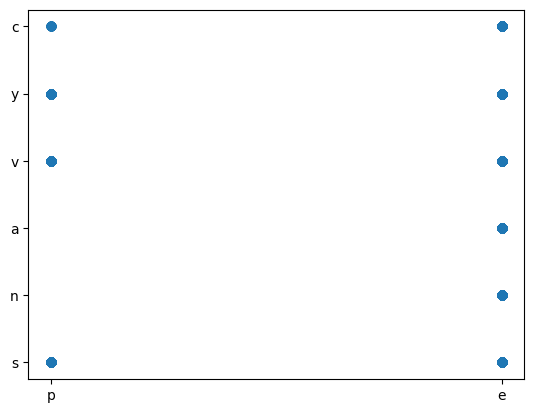

In [44]:
import matplotlib.pyplot as plt 

plt.scatter(cleaned_dataset[0], cleaned_dataset[21])
plt.show()

In [46]:
cleaned_dataset.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
dtype: object

In [58]:
df_encoded = pd.get_dummies(cleaned_dataset, drop_first=False)

In [59]:
df_encoded

,0_e,0_p,1_b,1_c,1_f,1_k,1_s,1_x,2_f,2_g,...,21_s,21_v,21_y,22_d,22_g,22_l,22_m,22_p,22_u,22_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [60]:
from sklearn.model_selection import train_test_split

x = df_encoded.iloc[:, 1:]
y = df_encoded.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 


In [62]:
model = RandomForestClassifier(n_estimators=1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=42)

In [63]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  1.0
